<a href="https://colab.research.google.com/github/yusufghifari29/Pemrograman_Python/blob/main/Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

'DATASET DAUN'/   PYTHON.ipynb   Untitled0.ipynb   Untitled1.ipynb


In [23]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [61]:
print("[INFO] loading images...")
imagePaths = paths.list_images("DATASET DAUN")
data = []
labels = []

[INFO] loading images...


In [62]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [63]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [64]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [65]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [66]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(450, 128, 128, 3)
(151, 128, 128, 3)


In [70]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(12, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 12)      336       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 12)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 16)        1744      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1440100   
_________________________________________________________________
dense_17 (Dense)             (None, 5)               

In [71]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [72]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
15/15 [==============================] - 4s 292ms/step - loss: 1.6283 - accuracy: 0.2311 - val_loss: 1.5338 - val_accuracy: 0.3113
Epoch 2/25
15/15 [==============================] - 4s 282ms/step - loss: 1.4548 - accuracy: 0.4089 - val_loss: 1.4308 - val_accuracy: 0.4305
Epoch 3/25
15/15 [==============================] - 4s 284ms/step - loss: 1.2187 - accuracy: 0.5489 - val_loss: 1.1774 - val_accuracy: 0.5497
Epoch 4/25
15/15 [==============================] - 4s 281ms/step - loss: 0.9222 - accuracy: 0.6889 - val_loss: 1.2147 - val_accuracy: 0.5364
Epoch 5/25
15/15 [==============================] - 4s 281ms/step - loss: 0.9102 - accuracy: 0.6311 - val_loss: 1.0207 - val_accuracy: 0.6093
Epoch 6/25
15/15 [==============================] - 4s 284ms/step - loss: 0.7082 - accuracy: 0.7511 - val_loss: 0.9429 - val_accuracy: 0.6159
Epoch 7/25
15/15 [==============================] - 4s 281ms/step - loss: 0.5615 - accuracy: 0.8289 - val_loss: 1.1090 - val_accuracy: 0.5629
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


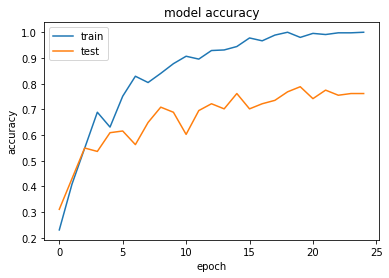

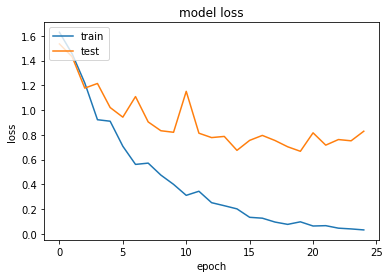

In [73]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [76]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_03       0.86      0.64      0.73        28
      GMB_04       0.84      0.76      0.80        21
      GMB_07       0.52      0.88      0.66        25
      GMB_08       0.88      0.93      0.90        41
      GMB_11       0.81      0.58      0.68        36

    accuracy                           0.76       151
   macro avg       0.78      0.76      0.75       151
weighted avg       0.80      0.76      0.76       151



In [86]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [87]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_131440_HDR.jpg'

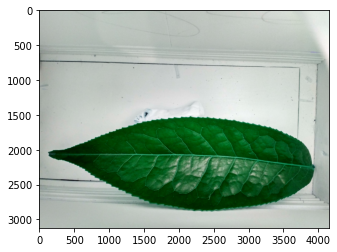

In [88]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [89]:
image_testing = Image.open('IMG_20200814_131440_HDR.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [90]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [92]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.6543312e-01 3.9247584e-07 3.4548171e-02 5.7401189e-06 1.2494876e-05]]
['GMB_03']
